<a href="https://www.kaggle.com/code/himanshikawade04/medical-insurance-cost-prediction?scriptVersionId=185920323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
## import libraries
import pandas as pd
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
## import dataset
df=pd.read_csv('/kaggle/input/used-medical-insurance/medical_insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Know about the data

In [4]:
df.shape

(2772, 7)

In [5]:
df.describe()

,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Makee the float to int 

In [8]:
df['charges'] = df['charges'].astype(int)

In [9]:
df['bmi'] = df['bmi'].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       2772 non-null   int64 
 1   sex       2772 non-null   object
 2   bmi       2772 non-null   int64 
 3   children  2772 non-null   int64 
 4   smoker    2772 non-null   object
 5   region    2772 non-null   object
 6   charges   2772 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 151.7+ KB


## Categorize Numerical and Categorical data

In [11]:
numerical_cols = ['age', 'bmi', 'children', 'charges']
categorical_cols = ['sex', 'smoker', 'region']

In [12]:
numerical_cols

['age', 'bmi', 'children', 'charges']

In [13]:
categorical_cols

['sex', 'smoker', 'region']

## Visualization

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
## Histogram

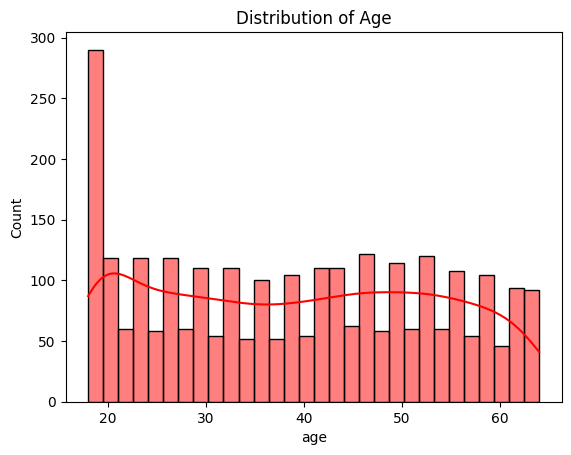

In [16]:
sns.histplot(df['age'], bins=30,color='red', kde=True)
plt.title('Distribution of Age')
plt.show()

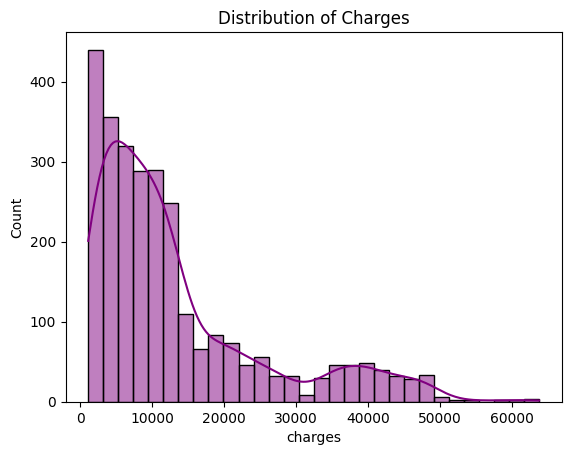

In [17]:
sns.histplot(df['charges'].astype(float), bins=30,color='purple', kde=True)
plt.title('Distribution of Charges')
plt.show()

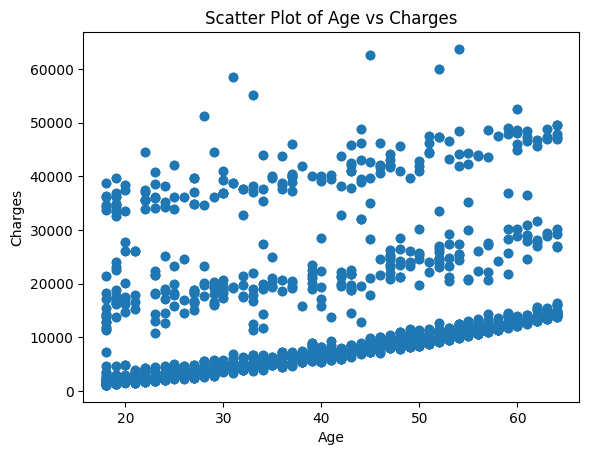

In [18]:

    plt.scatter(df['age'], df['charges'])
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title('Scatter Plot of Age vs Charges')
    plt.show()


In [19]:
## Boxplot

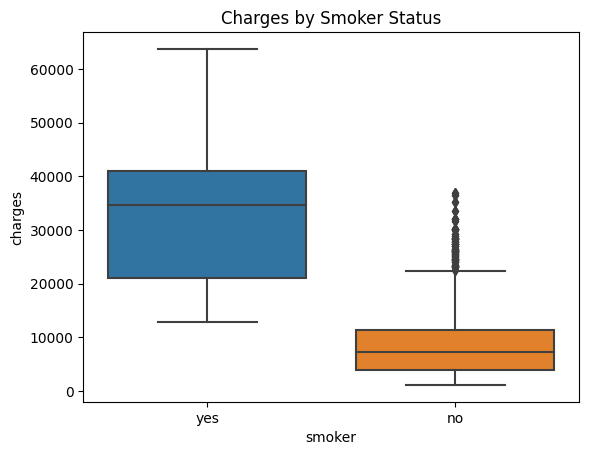

In [20]:
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

In [21]:
# pairplot

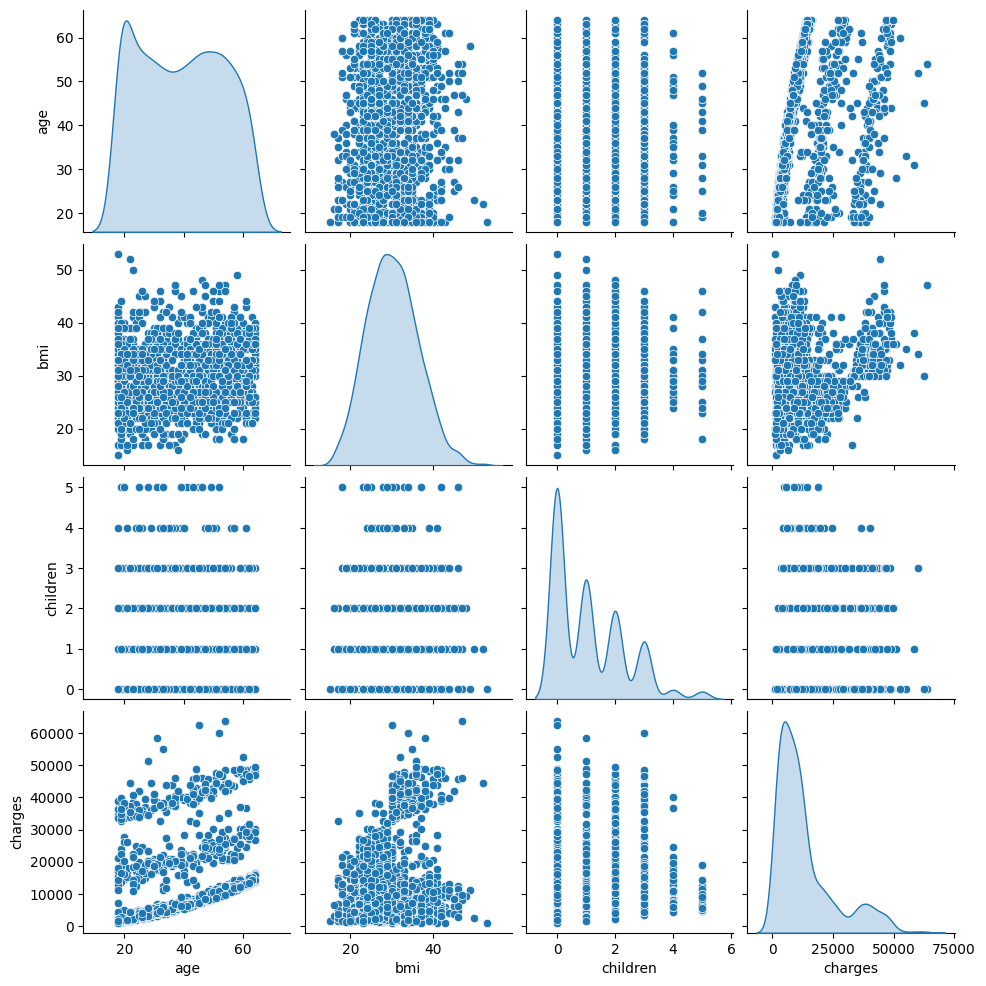

In [22]:
sns.pairplot(df, diag_kind='kde')
plt.show()

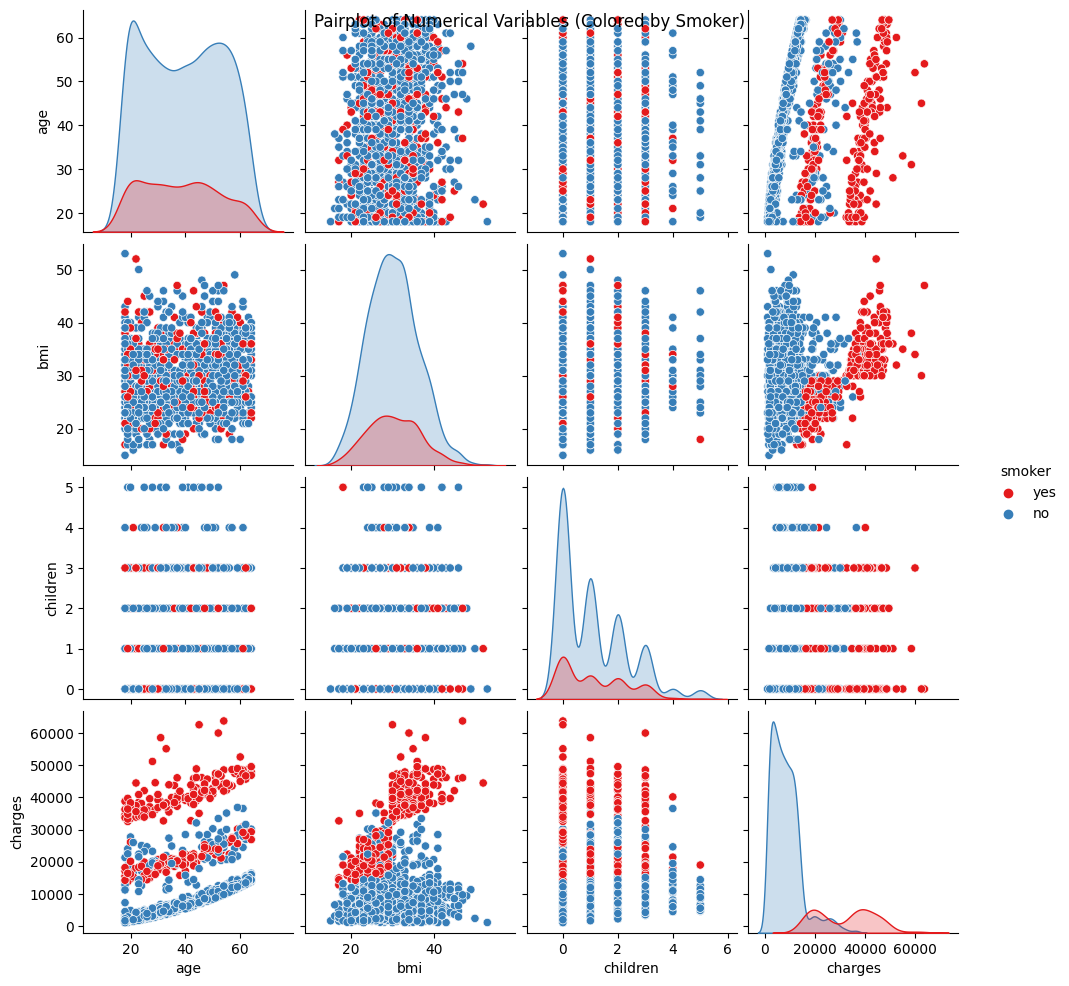

In [23]:
sns.pairplot(df, hue='smoker', palette='Set1')
plt.suptitle('Pairplot of Numerical Variables (Colored by Smoker)')
plt.show()

## train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df[['age', 'bmi', 'children']]  
y = df['charges'] 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train

,age,bmi,children
1864,21,36,0
1997,38,34,2
1336,21,25,0
655,52,25,2
261,20,26,1
...,...,...,...
1638,54,34,2
1095,18,31,4
1130,39,23,5
1294,58,25,0


In [28]:
y_train

1864     1534
1997     6571
1336     2007
655     24667
261     17085
        ...  
1638    44260
1095     4561
1130     8582
1294    11931
860     46113
Name: charges, Length: 2217, dtype: int64

In [29]:
X_test

,age,bmi,children
1106,49,29,0
1321,62,26,0
2313,57,20,1
2274,22,39,0
1432,18,38,2
...,...,...,...
930,26,46,1
2610,41,23,1
1700,27,31,0
100,41,31,0


In [30]:
y_test

1106     8988
1321    28101
2313    12032
2274     1682
1432     3393
        ...  
930      2927
2610     6858
1700    34838
100      6186
315      9722
Name: charges, Length: 555, dtype: int64

In [31]:
print("X_train shape {} and size {}".format(X_train.shape,X_train.size))
print("X_test shape {} and size {}".format(X_test.shape,X_test.size))
print("y_train shape {} and size {}".format(y_train.shape,y_train.size))
print("y_test shape {} and size {}".format(y_test.shape,y_test.size))

X_train shape (2217, 3) and size 6651
X_test shape (555, 3) and size 1665
y_train shape (2217,) and size 2217
y_test shape (555,) and size 555


## Model Building

In [32]:
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor

In [33]:
model = XGBRegressor()
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [34]:
y_pred=model.predict(X_test)

In [35]:
y_pred

array([1.23491885e+04, 2.61833730e+04, 1.24799521e+04, 2.23943506e+03,
       4.37998096e+03, 1.76270527e+04, 8.55312402e+03, 4.65195742e+04,
       3.43839414e+04, 5.35990527e+03, 4.83765674e+03, 1.67178438e+04,
       4.57513086e+03, 2.14233711e+04, 4.64334961e+03, 7.29504492e+03,
       2.26151543e+04, 1.25158125e+04, 6.50570605e+03, 2.02183125e+04,
       1.06691406e+04, 4.29174023e+04, 1.57954795e+04, 4.33433633e+04,
       1.13641475e+04, 1.03856309e+04, 1.46772815e+03, 1.54577666e+04,
       1.39187051e+04, 1.14412231e+03, 9.41101465e+03, 5.49788281e+03,
       1.28662588e+04, 1.14087510e+04, 3.37335078e+04, 5.56629248e+03,
       4.09708405e+01, 6.92332764e+03, 7.46304395e+03, 1.29471641e+04,
       8.66090430e+03, 7.94979541e+03, 1.30605938e+04, 2.15156396e+03,
       1.76495667e+03, 7.04826709e+03, 6.00006445e+03, 1.55608008e+04,
       1.67280840e+04, 1.17012979e+04, 3.59919727e+04, 9.91759375e+03,
       4.99050049e+03, 4.96817773e+03, 5.43674365e+03, 1.21888066e+04,
      

In [36]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 76118088.018449


In [37]:
r2 = model.score(X_test, y_test)
print(f"R-squared: {r2}")

R-squared: 0.5040554851246415


In [38]:
print('Feature Importances:')
for feature, importance in zip(X.columns, model.feature_importances_):
    print(f'{feature}: {importance}')

Feature Importances:
age: 0.41249385476112366
bmi: 0.3067200183868408
children: 0.2807861566543579
